# 1: Reading and Understanding the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
link='https://drive.google.com/file/d/1G30MOITcbxQTObh6y-5rODMyg8tWD9QG/view?usp=share_link'

In [3]:
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2: Data Cleansing 

In [6]:
# Change type: InvoiceID to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M%S')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Check null and delete null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df[df['CustomerID'].notna()]
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# Delete .0 (ex: 17850.0 --> 17850)
df['CustomerID'] = df['CustomerID'].astype("str")
df['CustomerID'] = df['CustomerID'].str[:-2]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:02:06,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:02:06,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:02:06,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:02:06,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:02:06,3.39,17850,United Kingdom


# 3: EDA, Data Preparation  

In [11]:
print('Khảo sát khoảng thời gian từ {a} đến {b}'.format(a = min(df['InvoiceDate'].dt.date), b = max(df['InvoiceDate'].dt.date)))

Khảo sát khoảng thời gian từ 2010-12-01 đến 2011-12-09


In [12]:
# Top 10 selling items
df.groupby('Description').agg(Count = ('Description','count')).sort_values('Count', ascending=False).reset_index().head(10)

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416
5,LUNCH BAG RED RETROSPOT,1358
6,SET OF 3 CAKE TINS PANTRY DESIGN,1232
7,POSTAGE,1196
8,LUNCH BAG BLACK SKULL.,1126
9,PACK OF 72 RETROSPOT CAKE CASES,1080


In [13]:
# Top countries
df['Country'].value_counts().head(10)

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: count, dtype: int64

In [14]:
# Calculate Total Price for Monetary
df['Total Price'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:02:06,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:02:06,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:02:06,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:02:06,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:02:06,3.39,17850,United Kingdom,20.34


In [15]:
# Calculate current date for Recency
import datetime
current_date = max(df['InvoiceDate'] + datetime.timedelta(days=1))


In [17]:
# Create Recency, Frequency, Monetary table (rfm_table)
rfm_table = df.groupby('CustomerID').agg(Recency = ('InvoiceDate', lambda i: (current_date - i.max()).days), 
                                         Frequency = ('InvoiceDate', 'count'),
                                          Monetary = ('Total Price', 'sum') )
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,0.00
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,13,176.60


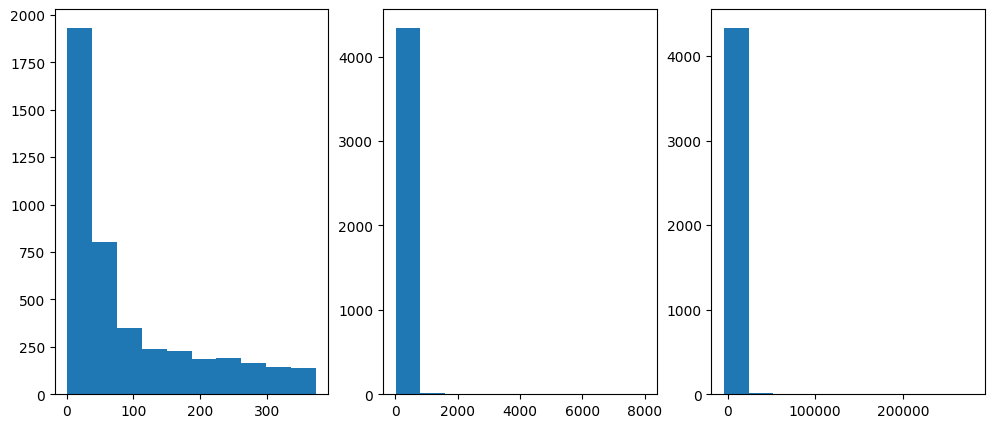

In [18]:
# Plot R F M to clarify the data distribution
fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].hist(rfm_table['Recency'])
ax[1].hist(rfm_table['Frequency'])
ax[2].hist(rfm_table['Monetary'])
plt.show();


Data is skewed to the left to we have to transform the data. There are the ways to transform the data:
1. Log 
2. Square Root 
3. Box-Cox

With negative data as Monetary, we use Cube-root to transform.

In [23]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(7,7))
    sns.histplot(rfm_table[x], kde=True,ax=ax[0,0])
    ax[0, 0].set_title("Original Distribution")

    sns.histplot(np.log(rfm_table[x]),kde=True, ax=ax[0,1])
    ax[0, 1].set_title("Log Transformation")

    sns.histplot(np.sqrt(rfm_table[x]),kde=True, ax=ax[1,0])
    ax[1, 0].set_title("Square Root Transformation")

    sns.histplot(stats.boxcox(rfm_table[x])[0],kde=True, ax=ax[1,1])
    ax[1, 1].set_title("Box-Cox Transformation")

    plt.tight_layout()
    plt.show()
    
    print(rfm_table[x].skew().round(2))
    print(np.log(rfm_table[x]).skew().round(2))
    print(np.sqrt(rfm_table[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_table[x])[0]).skew().round(2))

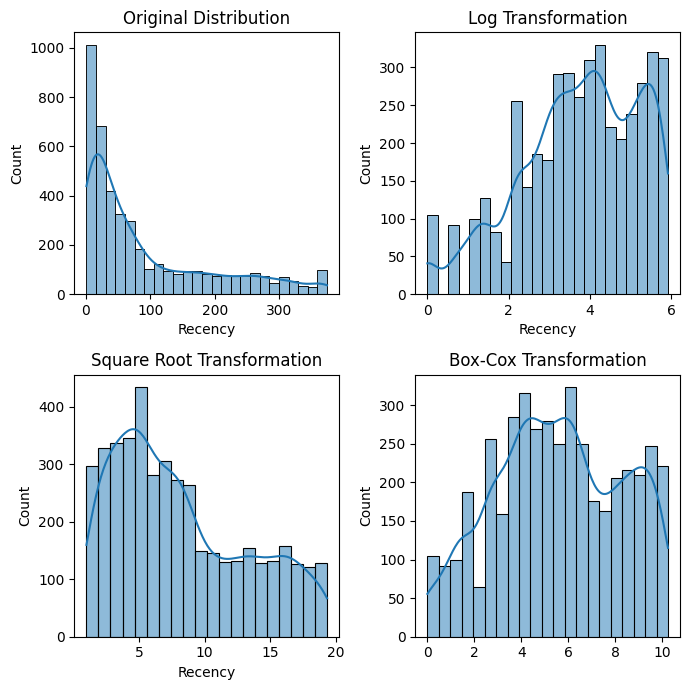

1.25
-0.53
0.59
-0.07


In [24]:
analyze_skewness('Recency')

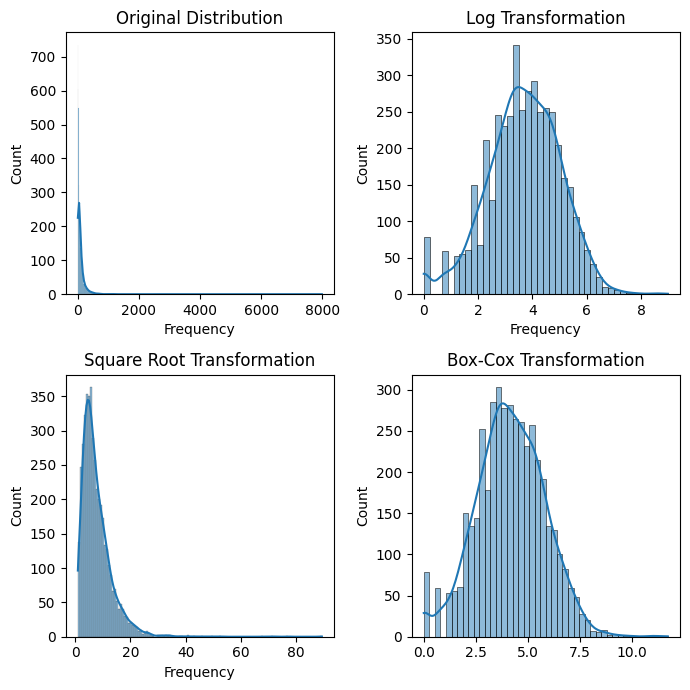

18.15
-0.24
3.2
0.0


In [25]:
analyze_skewness('Frequency')

We choose Box-Cox tranformation because the skew values are near to 0.

In [26]:
rfm_trans = pd.DataFrame()
rfm_trans['Recency'] = stats.boxcox(rfm_table['Recency'])[0]
rfm_trans['Frequency'] = stats.boxcox(rfm_table['Frequency'])[0]
rfm_trans['Monetary'] = pd.Series(np.cbrt(rfm_table['Monetary'])).values # Cube_root
rfm_trans.head()

,Recency,Frequency,Monetary
0,9.876619,0.707055,0.000000
1,0.735846,6.060363,16.273929
2,6.384920,3.794006,12.158183
3,3.826255,4.862047,12.068017
4,9.741979,3.075409,6.941001


After transforming data, we need to scale it before running model. In this case, we use StandardScaler.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
st_table = scaler.fit_transform(rfm_trans)
st_table

array([[ 1.61117306, -2.09807168, -1.92564704],
       [-1.79759219,  1.15134635,  1.33054192],
       [ 0.30905346, -0.22431569,  0.50703791],
       ...,
       [-1.14097185, -0.85048403, -0.80307538],
       [-1.48869338,  2.36366091,  0.63453134],
       [-0.10466245,  0.391469  ,  0.52497099]])

# 4: Model Building K-Means Clustering vs Hierarchical Clustering

In [28]:
import warnings
warnings.filterwarnings("ignore")

## K-Means Clustering

Find number of clusters by Elbow method

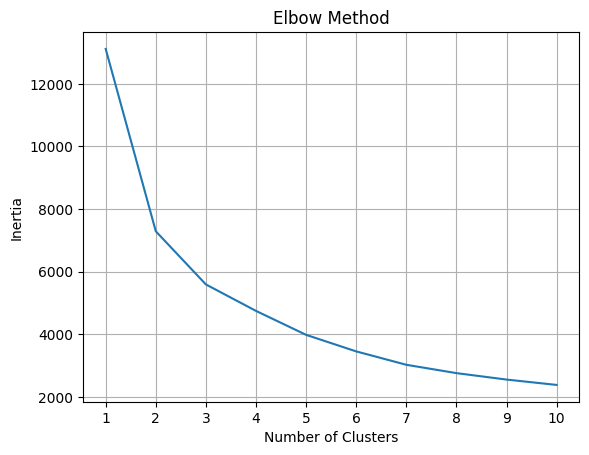

In [29]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(st_table)
    inertia.append(kmeans.inertia_)

# plot the inertia values for each value of k
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks(range(1,11))
plt.ylabel('Inertia')
plt.grid()
plt.show();

Choose n_clusters = 3

In [30]:
mm_model = KMeans(n_clusters=3, random_state=42).fit(st_table)

In [31]:
# Result 
rfm_table['Cluster'] = mm_model.labels_+1
rfm_table.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,326,2,0.00,2
12347,2,182,4310.00,1
12348,75,31,1797.24,3
12349,19,73,1757.55,3
12350,310,17,334.40,2


In [32]:
# Find mean of each R F M columns that grouped by clusters to mark Rank
result = rfm_table.groupby('Cluster').agg(Recency = ('Recency','mean'),Frequency = ('Frequency','mean'), Monetary = ('Monetary','mean'))
result

,Recency,Frequency,Monetary
Cluster,,,
1,17.877707,312.264968,7356.522790
2,185.513956,19.145024,351.297780
3,42.634863,67.122228,1003.742487


In [33]:
def rank_class(row):
    if row["Cluster"]==1:
        return 'A'
    elif row["Cluster"]==3:
        return 'B'
    else:
        return 'C'

In [34]:
rfm_table['Rank']=rfm_table.apply(rank_class, axis = 1)
rfm_table

,Recency,Frequency,Monetary,Cluster,Rank
CustomerID,,,,,
12346,326,2,0.00,2,C
12347,2,182,4310.00,1,A
12348,75,31,1797.24,3,B
12349,19,73,1757.55,3,B
12350,310,17,334.40,2,C
...,...,...,...,...,...
18280,278,10,180.60,2,C
18281,181,7,80.82,2,C
18282,8,13,176.60,3,B


''

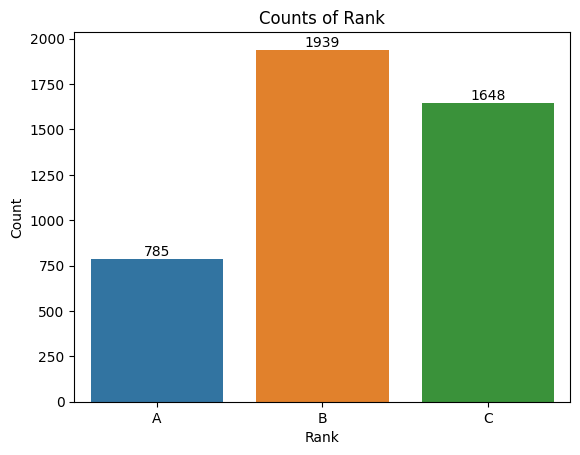

In [35]:
# Plot the count of Rank
ax = sns.countplot(x=rfm_table['Rank'], order=sorted(rfm_table['Rank'].unique()))
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Counts of Rank')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')
;

## Hierarchical Clustering

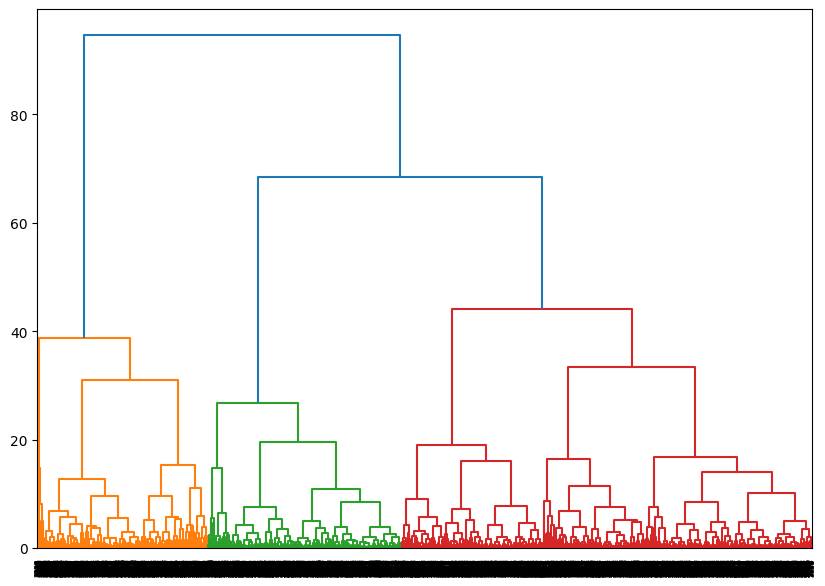

In [36]:
# Draw Dendogram to find n_clusters
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(st_table, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show();

### Clusters = 3

In [37]:
# Choose n_clusters = 3
mm_h = AgglomerativeClustering(n_clusters=3).fit(st_table)

In [38]:
rfm_table['Cluster_H'] = mm_h.labels_+1
rfm_table

,Recency,Frequency,Monetary,Cluster,Rank,Cluster_H
CustomerID,,,,,,
12346,326,2,0.00,2,C,3
12347,2,182,4310.00,1,A,2
12348,75,31,1797.24,3,B,1
12349,19,73,1757.55,3,B,2
12350,310,17,334.40,2,C,3
...,...,...,...,...,...,...
18280,278,10,180.60,2,C,3
18281,181,7,80.82,2,C,3
18282,8,13,176.60,3,B,1


In [39]:
result_H = rfm_table.groupby('Cluster_H').agg(Recency = ('Recency','mean'),Frequency = ('Frequency','mean'), Monetary = ('Monetary','mean'))
result_H

,Recency,Frequency,Monetary
Cluster_H,,,
1,51.542549,50.443197,862.903617
2,28.061203,278.250000,6225.714668
3,234.270814,19.963403,275.256176


In [40]:
def rank_class_H(row):
    if row["Cluster_H"]==2:
        return 'A'
    elif row["Cluster_H"]==1:
        return 'B'
    else:
        return 'C'

In [41]:
rfm_table['Rank_H']=rfm_table.apply(rank_class_H, axis = 1)
rfm_table

,Recency,Frequency,Monetary,Cluster,Rank,Cluster_H,Rank_H
CustomerID,,,,,,,
12346,326,2,0.00,2,C,3,C
12347,2,182,4310.00,1,A,2,A
12348,75,31,1797.24,3,B,1,B
12349,19,73,1757.55,3,B,2,A
12350,310,17,334.40,2,C,3,C
...,...,...,...,...,...,...,...
18280,278,10,180.60,2,C,3,C
18281,181,7,80.82,2,C,3,C
18282,8,13,176.60,3,B,1,B


''

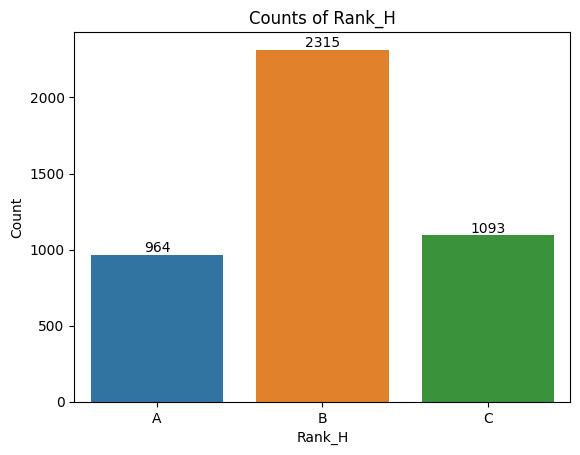

In [42]:
ax = sns.countplot(x=rfm_table['Rank_H'], order=sorted(rfm_table['Rank_H'].unique()))
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Counts of Rank_H')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')
;

### Cluster = 4

In [43]:
mm_h = AgglomerativeClustering(n_clusters=4).fit(st_table)

In [44]:
rfm_table['Cluster_H'] = mm_h.labels_+1
rfm_table

,Recency,Frequency,Monetary,Cluster,Rank,Cluster_H,Rank_H
CustomerID,,,,,,,
12346,326,2,0.00,2,C,3,C
12347,2,182,4310.00,1,A,1,A
12348,75,31,1797.24,3,B,2,B
12349,19,73,1757.55,3,B,1,A
12350,310,17,334.40,2,C,3,C
...,...,...,...,...,...,...,...
18280,278,10,180.60,2,C,3,C
18281,181,7,80.82,2,C,3,C
18282,8,13,176.60,3,B,2,B


In [45]:
result_H = rfm_table.groupby('Cluster_H').agg(Recency = ('Recency','mean'),Frequency = ('Frequency','mean'), Monetary = ('Monetary','mean'))
result_H

,Recency,Frequency,Monetary
Cluster_H,,,
1,28.061203,278.250000,6225.714668
2,71.301912,35.735662,738.570417
3,234.270814,19.963403,275.256176
4,13.979950,78.402256,1099.261342


In [46]:
def rank_class_H(row):
    if row["Cluster_H"]==1:
        return 'A'
    elif row["Cluster_H"]==4:
        return 'B'
    elif row["Cluster_H"]==2:
        return 'C'
    else:
        return 'D'

In [47]:
rfm_table['Rank_H']=rfm_table.apply(rank_class_H, axis = 1)
rfm_table

,Recency,Frequency,Monetary,Cluster,Rank,Cluster_H,Rank_H
CustomerID,,,,,,,
12346,326,2,0.00,2,C,3,D
12347,2,182,4310.00,1,A,1,A
12348,75,31,1797.24,3,B,2,C
12349,19,73,1757.55,3,B,1,A
12350,310,17,334.40,2,C,3,D
...,...,...,...,...,...,...,...
18280,278,10,180.60,2,C,3,D
18281,181,7,80.82,2,C,3,D
18282,8,13,176.60,3,B,2,C


''

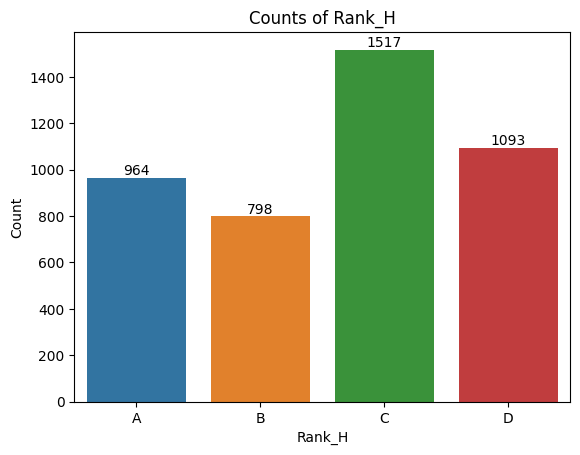

In [48]:
ax = sns.countplot(x=rfm_table['Rank_H'], order=sorted(rfm_table['Rank_H'].unique()))
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Counts of Rank_H')
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')
;

# 5: Final Analysis

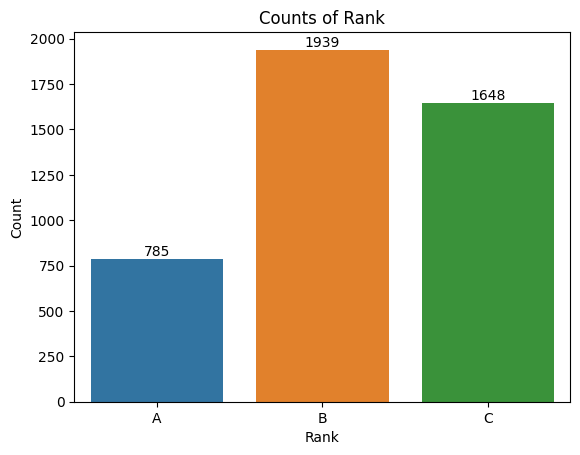 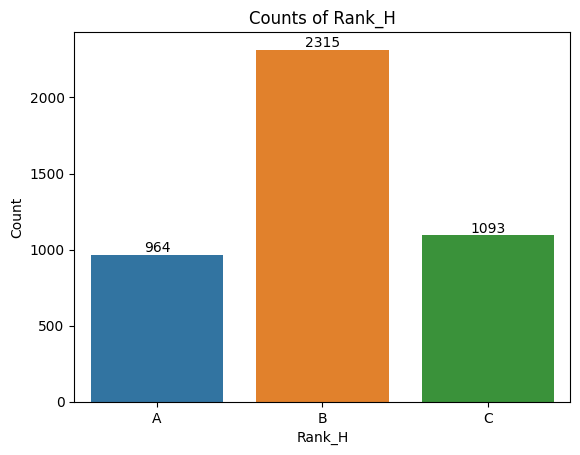

Rank A: K-Means < Hierarchical Clustering (HC)
<br/>
Rank B: K_Means < HC  -- (The Largest Amount)
<br/>
Rank C: HC < K-Means

Rank A (VIP): This segment represents your most valuable customers. They have high RFM scores, indicating recent purchases, frequent transactions, and significant monetary contributions. Treat them with personalized offers and exceptional service to maintain their loyalty.

Rank B (Potential Customers): These customers show potential for becoming high-value customers. They have moderate RFM scores and may have made recent purchases or exhibited reasonable transaction frequency. Implement targeted marketing strategies to nurture their engagement and encourage repeat purchases.

Rank C (New Customers or Low Sales Customers): This segment includes new customers or those with low sales activity. They have lower RFM scores, indicating fewer or infrequent purchases and lower monetary value. Focus on onboarding new customers effectively and implement re-engagement tactics for low sales customers to increase their transaction frequency and value.